<a href="https://colab.research.google.com/github/ruchisurya2002-maker/Analytics-Projects-/blob/main/Time_Series_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd



In [ ]:
data = pd.read_excel("/content/Travel_data.xlsx")

In [ ]:
display(data.columns)

Index(['Month', 'Passengers'], dtype='object')

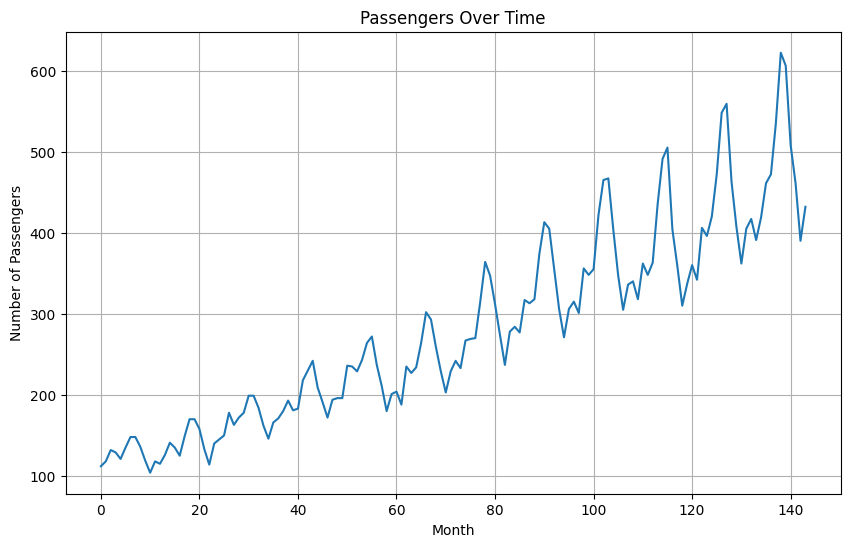

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(data['Passengers'])
plt.title('Passengers Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Passengers')
plt.grid(True)
plt.show()

In [ ]:
# Calculate the 3-month moving average
data['3_month_moving_average'] = data['Passengers'].rolling(window=3).mean()
display(data.head())

,Month,Passengers,3_month_moving_average
0,2025-01-01,112,NaN
1,2025-01-02,118,NaN
2,2025-01-03,132,120.666667
3,2025-01-04,129,126.333333
4,2025-01-05,121,127.333333


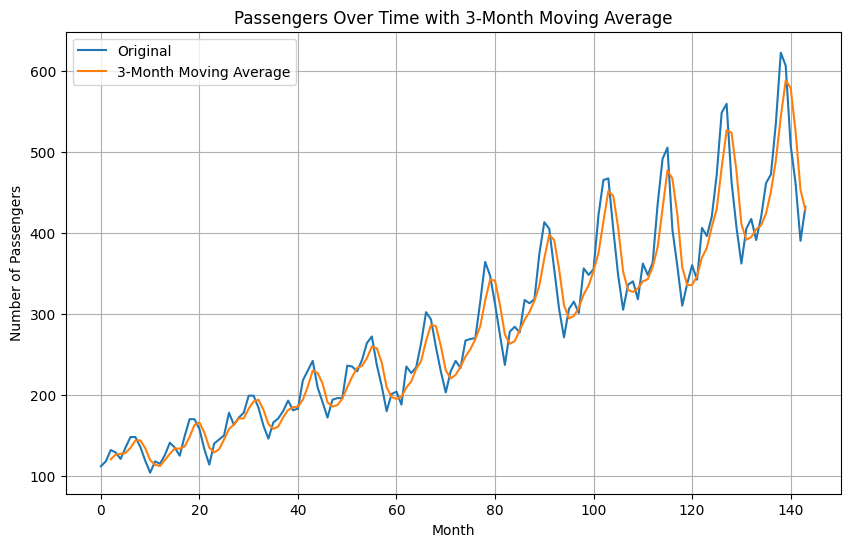

In [ ]:
# Calculate the 3-month moving average
data['3_month_moving_average'] = data['Passengers'].rolling(window=3).mean()

# Plot the original data and the moving average
plt.figure(figsize=(10, 6))
plt.plot(data['Passengers'], label='Original')
plt.plot(data['3_month_moving_average'], label='3-Month Moving Average')
plt.title('Passengers Over Time with 3-Month Moving Average')
plt.xlabel('Month')
plt.ylabel('Number of Passengers')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Drop the first two rows as the moving average is NaN
data_for_error = data.dropna()

# Calculate errors
mae = mean_absolute_error(data_for_error['Passengers'], data_for_error['3_month_moving_average'])
mse = mean_squared_error(data_for_error['Passengers'], data_for_error['3_month_moving_average'])
rmse = np.sqrt(mse)

# Calculate Mean Absolute Percentage Error (MAPE)
# Avoid division by zero
mape = np.mean(np.abs((data_for_error['Passengers'] - data_for_error['3_month_moving_average']) / data_for_error['Passengers'])) * 100

# Print the errors
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')

Mean Absolute Error (MAE): 21.32
Mean Squared Error (MSE): 789.56
Root Mean Squared Error (RMSE): 28.10
Mean Absolute Percentage Error (MAPE): 7.35%


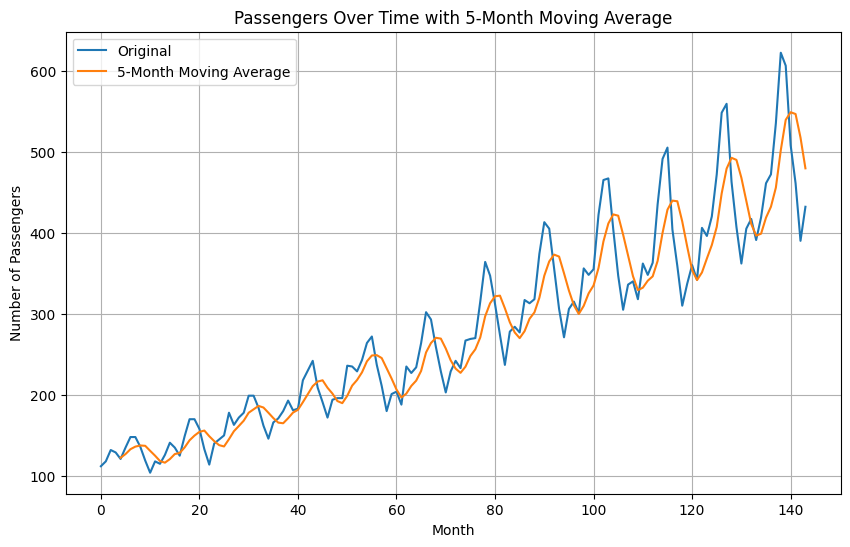

In [ ]:
# Calculate the 5-month moving average
data['5_month_moving_average'] = data['Passengers'].rolling(window=5).mean()

# Plot the original data and the moving average
plt.figure(figsize=(10, 6))
plt.plot(data['Passengers'], label='Original')
plt.plot(data['5_month_moving_average'], label='5-Month Moving Average')
plt.title('Passengers Over Time with 5-Month Moving Average')
plt.xlabel('Month')
plt.ylabel('Number of Passengers')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Drop the first four rows as the 5-month moving average is NaN
data_for_error_5month = data.dropna(subset=['5_month_moving_average'])

# Calculate errors for 5-month moving average
mae_5month = mean_absolute_error(data_for_error_5month['Passengers'], data_for_error_5month['5_month_moving_average'])
mse_5month = mean_squared_error(data_for_error_5month['Passengers'], data_for_error_5month['5_month_moving_average'])
rmse_5month = np.sqrt(mse_5month)
mape_5month = np.mean(np.abs((data_for_error_5month['Passengers'] - data_for_error_5month['5_month_moving_average']) / data_for_error_5month['Passengers'])) * 100


# Print the errors for 5-month moving average
print("Errors for 5-Month Moving Average:")
print(f'Mean Absolute Error (MAE): {mae_5month:.2f}')
print(f'Mean Squared Error (MSE): {mse_5month:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse_5month:.2f}')
print(f'Mean Absolute Percentage Error (MAPE): {mape_5month:.2f}%')
print("\nComparison with 3-Month Moving Average Errors:")
print(f'MAE: 3-Month = {mae:.2f}, 5-Month = {mae_5month:.2f}')
print(f'MSE: 3-Month = {mse:.2f}, 5-Month = {mse_5month:.2f}')
print(f'RMSE: 3-Month = {rmse:.2f}, 5-Month = {rmse_5month:.2f}')
print(f'MAPE: 3-Month = {mape:.2f}%, 5-Month = {mape_5month:.2f}%')

Errors for 5-Month Moving Average:
Mean Absolute Error (MAE): 31.51
Mean Squared Error (MSE): 1769.53
Root Mean Squared Error (RMSE): 42.07
Mean Absolute Percentage Error (MAPE): 10.60%

Comparison with 3-Month Moving Average Errors:
MAE: 3-Month = 21.32, 5-Month = 31.51
MSE: 3-Month = 789.56, 5-Month = 1769.53
RMSE: 3-Month = 28.10, 5-Month = 42.07
MAPE: 3-Month = 7.35%, 5-Month = 10.60%


/usr/local/lib/python3.12/dist-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


,Month,Passengers,3_month_moving_average,5_month_moving_average,SES
0,2025-01-01,112,NaN,NaN,112.000
1,2025-01-02,118,NaN,NaN,112.000
2,2025-01-03,132,120.666667,NaN,113.200
3,2025-01-04,129,126.333333,NaN,116.960
4,2025-01-05,121,127.333333,122.4,119.368


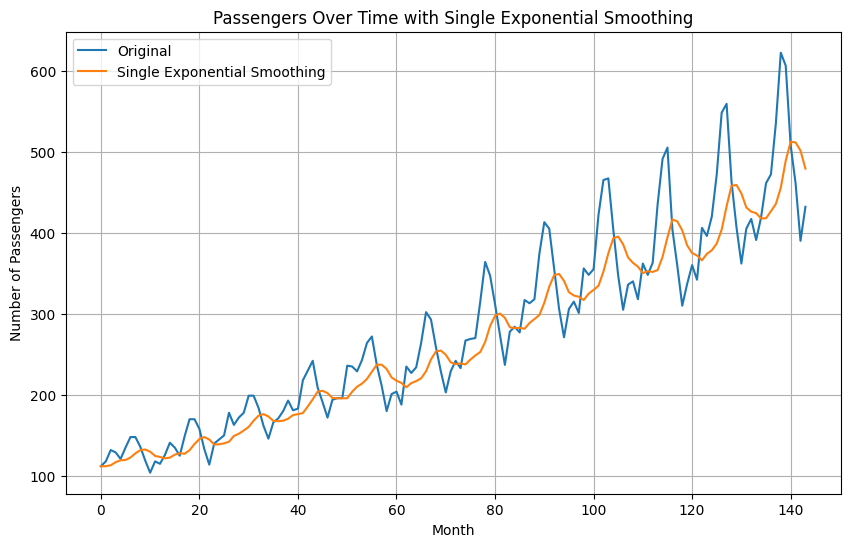

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Apply single exponential smoothing
# You can adjust the smoothing_level (alpha) parameter
ses = SimpleExpSmoothing(data['Passengers']).fit(smoothing_level=0.2)
data['SES'] = ses.fittedvalues
display(data.head())

# Plot the original data and the single exponential smoothing result
plt.figure(figsize=(10, 6))
plt.plot(data['Passengers'], label='Original')
plt.plot(data['SES'], label='Single Exponential Smoothing')
plt.title('Passengers Over Time with Single Exponential Smoothing')
plt.xlabel('Month')
plt.ylabel('Number of Passengers')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Drop rows with NaN SES values
data_for_error_ses = data.dropna(subset=['SES'])

# Calculate errors for Single Exponential Smoothing
mae_ses = mean_absolute_error(data_for_error_ses['Passengers'], data_for_error_ses['SES'])
mse_ses = mean_squared_error(data_for_error_ses['Passengers'], data_for_error_ses['SES'])
rmse_ses = np.sqrt(mse_ses)
mape_ses = np.mean(np.abs((data_for_error_ses['Passengers'] - data_for_error_ses['SES']) / data_for_error_ses['Passengers'])) * 100

# Print the errors for Single Exponential Smoothing
print("Errors for Single Exponential Smoothing:")
print(f'Mean Absolute Error (MAE): {mae_ses:.2f}')
print(f'Mean Squared Error (MSE): {mse_ses:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse_ses:.2f}')
print(f'Mean Absolute Percentage Error (MAPE): {mape_ses:.2f}%')

print("\nComparison with Moving Average Errors:")
print(f'MAE: 3-Month = {mae:.2f}, 5-Month = {mae_5month:.2f}, SES = {mae_ses:.2f}')
print(f'MSE: 3-Month = {mse:.2f}, 5-Month = {mse_5month:.2f}, SES = {mse_ses:.2f}')
print(f'RMSE: 3-Month = {rmse:.2f}, 5-Month = {rmse_5month:.2f}, SES = {rmse_ses:.2f}')
print(f'MAPE: 3-Month = {mape:.2f}%, 5-Month = {mape_5month:.2f}%, SES = {mape_ses:.2f}%')

Errors for Single Exponential Smoothing:
Mean Absolute Error (MAE): 34.38
Mean Squared Error (MSE): 2270.99
Root Mean Squared Error (RMSE): 47.65
Mean Absolute Percentage Error (MAPE): 11.49%

Comparison with Moving Average Errors:
MAE: 3-Month = 21.32, 5-Month = 31.51, SES = 34.38
MSE: 3-Month = 789.56, 5-Month = 1769.53, SES = 2270.99
RMSE: 3-Month = 28.10, 5-Month = 42.07, SES = 47.65
MAPE: 3-Month = 7.35%, 5-Month = 10.60%, SES = 11.49%


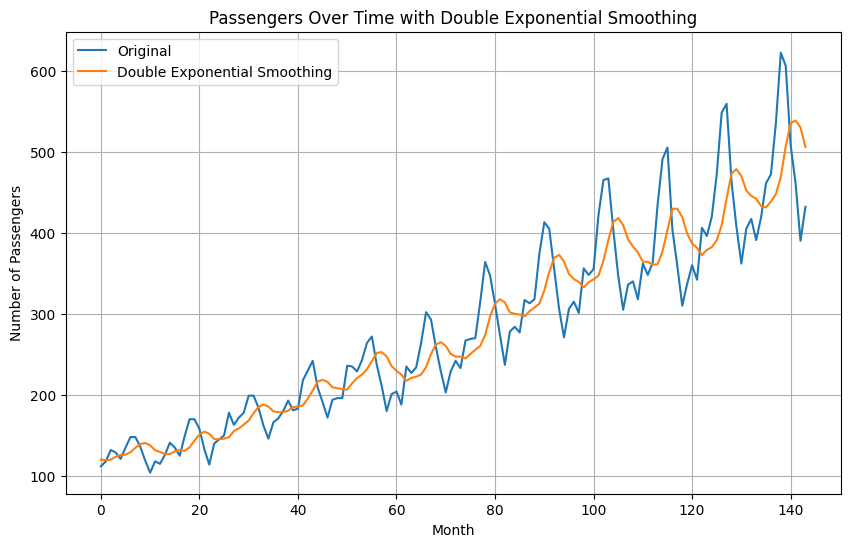

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Apply double exponential smoothing (Holt's method)
# You can adjust the smoothing_level (alpha) and smoothing_trend (beta) parameters
des = ExponentialSmoothing(data['Passengers'], trend='add').fit(smoothing_level=0.2, smoothing_trend=0.1)
data['DES'] = des.fittedvalues

# Plot the original data and the double exponential smoothing result
plt.figure(figsize=(10, 6))
plt.plot(data['Passengers'], label='Original')
plt.plot(data['DES'], label='Double Exponential Smoothing')
plt.title('Passengers Over Time with Double Exponential Smoothing')
plt.xlabel('Month')
plt.ylabel('Number of Passengers')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Drop rows with NaN DES values
data_for_error_des = data.dropna(subset=['DES'])

# Calculate errors for Double Exponential Smoothing
mae_des = mean_absolute_error(data_for_error_des['Passengers'], data_for_error_des['DES'])
mse_des = mean_squared_error(data_for_error_des['Passengers'], data_for_error_des['DES'])
rmse_des = np.sqrt(mse_des)
mape_des = np.mean(np.abs((data_for_error_des['Passengers'] - data_for_error_des['DES']) / data_for_error_des['Passengers'])) * 100

# Print the errors for Double Exponential Smoothing
print("Errors for Double Exponential Smoothing:")
print(f'Mean Absolute Error (MAE): {mae_des:.2f}')
print(f'Mean Squared Error (MSE): {mse_des:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse_des:.2f}')
print(f'Mean Absolute Percentage Error (MAPE): {mape_des:.2f}%')

print("\nComparison with other models:")
print(f'MAE: 3-Month = {mae:.2f}, 5-Month = {mae_5month:.2f}, SES = {mae_ses:.2f}, DES = {mae_des:.2f}')
print(f'MSE: 3-Month = {mse:.2f}, 5-Month = {mse_5month:.2f}, SES = {mse_ses:.2f}, DES = {mae_des:.2f}')
print(f'RMSE: 3-Month = {rmse:.2f}, 5-Month = {rmse_5month:.2f}, SES = {rmse_ses:.2f}, DES = {rmse_des:.2f}')
print(f'MAPE: 3-Month = {mape:.2f}%, 5-Month = {mape_5month:.2f}%, SES = {mape_ses:.2f}%, DES = {mape_des:.2f}%')

Errors for Double Exponential Smoothing:
Mean Absolute Error (MAE): 36.00
Mean Squared Error (MSE): 2369.11
Root Mean Squared Error (RMSE): 48.67
Mean Absolute Percentage Error (MAPE): 12.20%

Comparison with other models:
MAE: 3-Month = 21.32, 5-Month = 31.51, SES = 34.38, DES = 36.00
MSE: 3-Month = 789.56, 5-Month = 1769.53, SES = 2270.99, DES = 2369.11
RMSE: 3-Month = 28.10, 5-Month = 42.07, SES = 47.65, DES = 48.67
MAPE: 3-Month = 7.35%, 5-Month = 10.60%, SES = 11.49%, DES = 12.20%


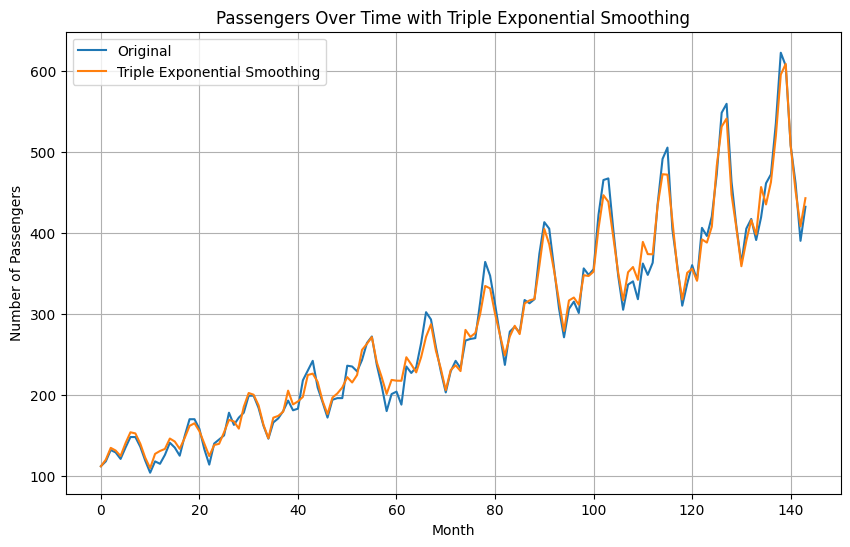

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Apply triple exponential smoothing (Holt-Winters method)
# You can adjust the parameters (smoothing_level, smoothing_trend, seasonal_smoothing, seasonal_periods)
tes = ExponentialSmoothing(data['Passengers'], trend='add', seasonal='add', seasonal_periods=12).fit()
data['TES'] = tes.fittedvalues

# Plot the original data and the triple exponential smoothing result
plt.figure(figsize=(10, 6))
plt.plot(data['Passengers'], label='Original')
plt.plot(data['TES'], label='Triple Exponential Smoothing')
plt.title('Passengers Over Time with Triple Exponential Smoothing')
plt.xlabel('Month')
plt.ylabel('Number of Passengers')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Drop rows with NaN TES values
data_for_error_tes = data.dropna(subset=['TES'])

# Calculate errors for Triple Exponential Smoothing
mae_tes = mean_absolute_error(data_for_error_tes['Passengers'], data_for_error_tes['TES'])
mse_tes = mean_squared_error(data_for_error_tes['Passengers'], data_for_error_tes['TES'])
rmse_tes = np.sqrt(mse_tes)
mape_tes = np.mean(np.abs((data_for_error_tes['Passengers'] - data_for_error_tes['TES']) / data_for_error_tes['Passengers'])) * 100

# Print the errors for Triple Exponential Smoothing
print("Errors for Triple Exponential Smoothing:")
print(f'Mean Absolute Error (MAE): {mae_tes:.2f}')
print(f'Mean Squared Error (MSE): {mse_tes:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse_tes:.2f}')
print(f'Mean Absolute Percentage Error (MAPE): {mape_tes:.2f}%')

print("\nComparison with other models:")
print(f'MAE: 3-Month = {mae:.2f}, 5-Month = {mae_5month:.2f}, SES = {mae_ses:.2f}, DES = {mae_des:.2f}, TES = {mae_tes:.2f}')
print(f'MSE: 3-Month = {mse:.2f}, 5-Month = {mse_5month:.2f}, SES = {mse_ses:.2f}, DES = {mae_des:.2f}, TES = {mae_tes:.2f}')
print(f'RMSE: 3-Month = {rmse:.2f}, 5-Month = {rmse_5month:.2f}, SES = {rmse_ses:.2f}, DES = {rmse_des:.2f}, TES = {rmse_tes:.2f}')
print(f'MAPE: 3-Month = {mape:.2f}%, 5-Month = {mape_5month:.2f}%, SES = {mape_ses:.2f}%, DES = {mape_des:.2f}%, TES = {mape_tes:.2f}%')

Errors for Triple Exponential Smoothing:
Mean Absolute Error (MAE): 9.41
Mean Squared Error (MSE): 149.75
Root Mean Squared Error (RMSE): 12.24
Mean Absolute Percentage Error (MAPE): 3.53%

Comparison with other models:
MAE: 3-Month = 21.32, 5-Month = 31.51, SES = 34.38, DES = 36.00, TES = 9.41
MSE: 3-Month = 789.56, 5-Month = 1769.53, SES = 2270.99, DES = 36.00, TES = 9.41
RMSE: 3-Month = 28.10, 5-Month = 42.07, SES = 47.65, DES = 48.67, TES = 12.24
MAPE: 3-Month = 7.35%, 5-Month = 10.60%, SES = 11.49%, DES = 12.20%, TES = 3.53%


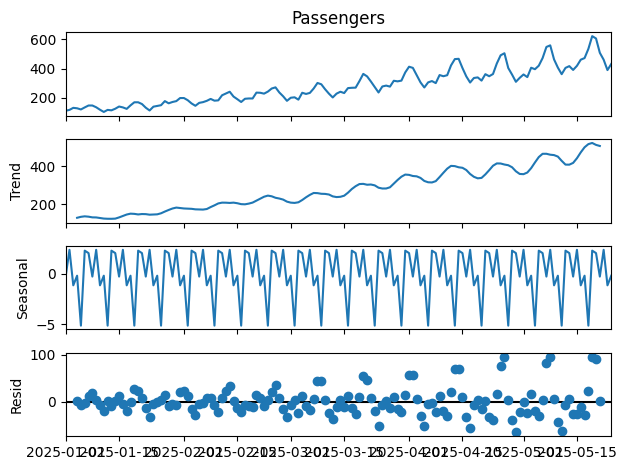

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Set the 'Month' column as the index
data = data.set_index('Month')

# Ensure the index is a DatetimeIndex
data.index = pd.to_datetime(data.index)

# Perform seasonal decomposition
result_add = seasonal_decompose(data['Passengers'], model='additive')

fig = result_add.plot()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Perform the Augmented Dickey-Fuller test
result = adfuller(data['Passengers'])

# Print the results
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.815369
p-value: 0.991880
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


In [ ]:
# Perform first-level differentiation
data['Passengers_diff'] = data['Passengers'].diff()
display(data.head())

,Passengers,3_month_moving_average,5_month_moving_average,SES,DES,TES,Passengers_diff
Month,,,,,,,
2025-01-01,112,NaN,NaN,112.000,120.184212,111.932942,NaN
2025-01-02,118,NaN,NaN,112.000,119.508142,120.109897,6.0
2025-01-03,132,120.666667,NaN,113.200,120.137123,134.660048,14.0
2025-01-04,129,126.333333,NaN,116.960,123.677566,131.353589,-3.0
2025-01-05,121,127.333333,122.4,119.368,126.016368,124.619547,-8.0


In [ ]:
from statsmodels.tsa.stattools import adfuller

# Perform the Augmented Dickey-Fuller test on the differenced data
result_diff = adfuller(data['Passengers_diff'].dropna()) # Drop NaN values from the differenced column

# Print the results
print('ADF Statistic (Differenced Data): %f' % result_diff[0])
print('p-value (Differenced Data): %f' % result_diff[1])
print('Critical Values (Differenced Data):')
for key, value in result_diff[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic (Differenced Data): -2.829267
p-value (Differenced Data): 0.054213
Critical Values (Differenced Data):
	1%: -3.482
	5%: -2.884
	10%: -2.579


In [ ]:
# Perform second-level differentiation
data['Passengers_diff2'] = data['Passengers_diff'].diff()
display(data.head())

,Passengers,3_month_moving_average,5_month_moving_average,SES,DES,TES,Passengers_diff,Passengers_diff2
Month,,,,,,,,
2025-01-01,112,NaN,NaN,112.000,120.184212,111.932942,NaN,NaN
2025-01-02,118,NaN,NaN,112.000,119.508142,120.109897,6.0,NaN
2025-01-03,132,120.666667,NaN,113.200,120.137123,134.660048,14.0,8.0
2025-01-04,129,126.333333,NaN,116.960,123.677566,131.353589,-3.0,-17.0
2025-01-05,121,127.333333,122.4,119.368,126.016368,124.619547,-8.0,-5.0


In [ ]:
from statsmodels.tsa.stattools import adfuller

# Perform the Augmented Dickey-Fuller test on the twice-differenced data
result_diff2 = adfuller(data['Passengers_diff2'].dropna()) # Drop NaN values

# Print the results
print('ADF Statistic (Twice Differenced Data): %f' % result_diff2[0])
print('p-value (Twice Differenced Data): %f' % result_diff2[1])
print('Critical Values (Twice Differenced Data):')
for key, value in result_diff2[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic (Twice Differenced Data): -16.384232
p-value (Twice Differenced Data): 0.000000
Critical Values (Twice Differenced Data):
	1%: -3.482
	5%: -2.884
	10%: -2.579


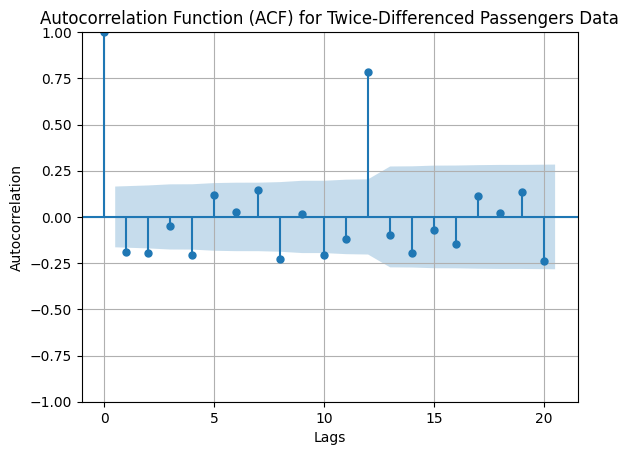

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

# Plot ACF for the twice-differenced data
plot_acf(data['Passengers_diff2'].dropna(), lags=20) # Drop NaN values
plt.title('Autocorrelation Function (ACF) for Twice-Differenced Passengers Data')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()

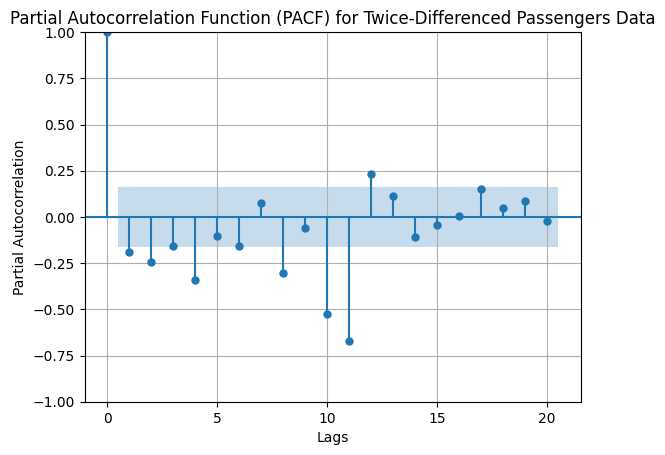

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt

# Plot PACF for the twice-differenced data
plot_pacf(data['Passengers_diff2'].dropna(), lags=20) # Drop NaN values
plt.title('Partial Autocorrelation Function (PACF) for Twice-Differenced Passengers Data')
plt.xlabel('Lags')
plt.ylabel('Partial Autocorrelation')
plt.grid(True)
plt.show()

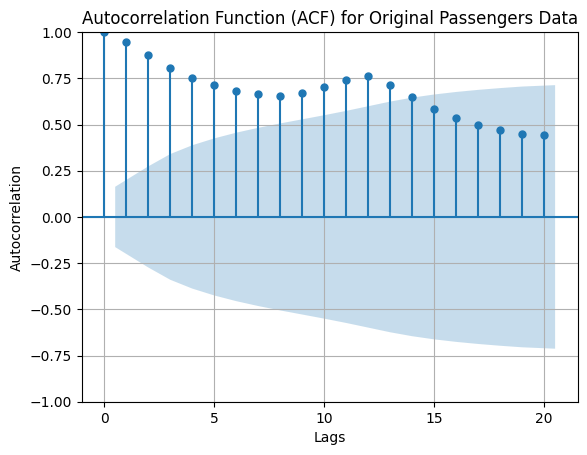

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

# Plot ACF for the original data
plot_acf(data['Passengers'], lags=20)
plt.title('Autocorrelation Function (ACF) for Original Passengers Data')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()

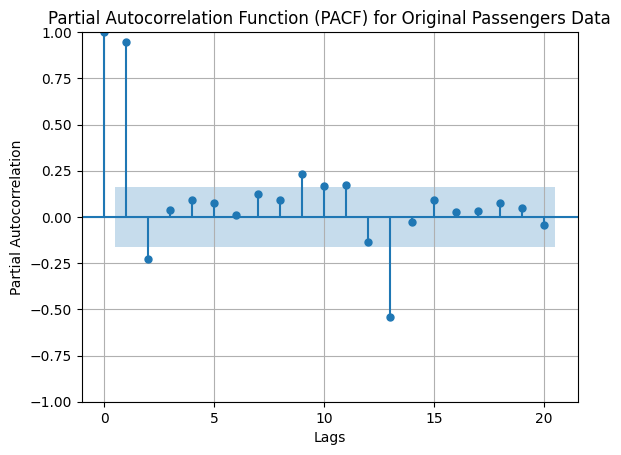

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt

# Plot PACF for the original data
plot_pacf(data['Passengers'], lags=20)
plt.title('Partial Autocorrelation Function (PACF) for Original Passengers Data')
plt.xlabel('Lags')
plt.ylabel('Partial Autocorrelation')
plt.grid(True)
plt.show()

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit ARIMA model with order (1,2,1)
# The data is already differenced twice to make it stationary, so we use d=0 in the ARIMA order
# However, the SARIMAX model handles differencing internally, so we use the original data and specify d=2
model = SARIMAX(data['Passengers'], order=(1, 2, 1))
results = model.fit()

# Print the model summary
print(results.summary())



/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  144
Model:               SARIMAX(1, 2, 1)   Log Likelihood                -696.464
Date:                Mon, 25 Aug 2025   AIC                           1398.928
Time:                        06:45:36   BIC                           1407.796
Sample:                    01-01-2025   HQIC                          1402.532
                         - 05-24-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3130      0.100      3.127      0.002       0.117       0.509
ma.L1         -0.9998      5.946     -0.168      0.866     -12.655      10.655
sigma2      1034.0044   6187.776      0.167      0.8

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit ARIMA model with order (1,2,2)
# The data is already differenced twice to make it stationary, so we use d=0 in the ARIMA order
# However, the SARIMAX model handles differencing internally, so we use the original data and specify d=2
model = SARIMAX(data['Passengers'], order=(1, 2, 2))
results = model.fit()

# Print the model summary
print(results.summary())



/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  144
Model:               SARIMAX(1, 2, 2)   Log Likelihood                -691.954
Date:                Mon, 25 Aug 2025   AIC                           1391.908
Time:                        06:45:22   BIC                           1403.732
Sample:                    01-01-2025   HQIC                          1396.713
                         - 05-24-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4710      0.123     -3.838      0.000      -0.711      -0.230
ma.L1         -0.1369     14.067     -0.010      0.992     -27.707      27.434
ma.L2         -0.8631     12.138     -0.071      0.9

In [ ]:

from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit ARIMA model with order (1,2,12)
# The data is already differenced twice to make it stationary, so we use d=0 in the ARIMA order
# However, the SARIMAX model handles differencing internally, so we use the original data and specify d=2
model = SARIMAX(data['Passengers'], order=(1, 2, 12))
results = model.fit()

# Print the model summary
print(results.summary())



/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  144
Model:              SARIMAX(1, 2, 12)   Log Likelihood                -651.547
Date:                Mon, 25 Aug 2025   AIC                           1331.094
Time:                        06:45:01   BIC                           1372.476
Sample:                    01-01-2025   HQIC                          1347.910
                         - 05-24-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2413      0.164     -1.470      0.141      -0.563       0.080
ma.L1         -0.3305    844.613     -0.000      1.000   -1655.742    1655.081
ma.L2         -0.1469    562.478     -0.000      1.0

/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
!pip install numpy==1.26.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 474.0 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 36.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [ ]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 10.8 MB/s eta 0:00:00


In [ ]:
from pmdarima import auto_arima

In [ ]:
import pandas as pd

data = pd.read_excel("/content/Travel_data.xlsx")

In [ ]:
from pmdarima import auto_arima

# Run auto_arima to find the best ARIMA model
# We can specify seasonal=True if we suspect seasonality, which is evident in the plot
# seasonal_period=12 for monthly data
# We can also set stepwise=True for faster search (default)
# suppress_warnings=True to avoid convergence warnings

stepwise_model = auto_arima(data['Passengers'], seasonal=True, m=12,
                            stepwise=True, suppress_warnings=True, error_action='ignore',
                            max_ord=None, trace=True)

# Print the model summary
print(stepwise_model.summary())

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=1020.048, Time=1.40 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.13 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.20 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,1,1)[12]             : AIC=1019.935, Time=0.85 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,1,0)[12]             : AIC=1019.290, Time=0.28 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(1,1,0)[12]             : AIC=1019.546, Time=0.82 sec
 ARIMA(1,1,2)(0,1,0)[12]             : AIC=1024.160, Time=0.13 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,1,0)[12]             : AIC=1017.847, Time=0.30 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(1,1,0)[12]             : AIC=1017.914, Time=0.68 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,1,1)[12]             : AIC=1018.359, Time=0.98 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(1,1,1)[12]             : AIC=1018.248, Time=3.23 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1022.393, Time=0.08 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=1022.393, Time=0.07 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(0,1,0)[12]             : AIC=1019.084, Time=0.30 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1020.393, Time=0.05 sec
 ARIMA(3,1,0)(0,1,0)[12]             : AIC=1023.666, Time=0.10 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(0,1,0)[12]             : AIC=1021.083, Time=0.47 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,1,0)[12] intercept   : AIC=inf, Time=0.66 sec

Best model:  ARIMA(2,1,1)(0,1,0)[12]          
Total fit time: 10.811 seconds
                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(2, 1, 1)x(0, 1, [], 12)   Log Likelihood                -504.923
Date:                             Mon, 25 Aug 2025   AIC                           1017.847
Time:                                     07:00:13   BIC                           1029.348
Sample:                                          0   HQIC                          1022.520
                                             - 144                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------